<a href="https://colab.research.google.com/github/jinjin0070/dataAnalysys/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_06_%EC%A7%80%EB%8F%84%EC%97%90%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B9%B5%EB%8D%95%ED%9B%84%EC%A7%80%EB%8F%84_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한글폰트 설정 및 라이브러리 임포트

In [1]:
# 코드 실행 후 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and direc

# 필요한 라이브러리 import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 멧플롯립 한글폰트 지정
plt.rc('font', family='NanumBarunGothic')    # 코랩에서 사용
# plt.rc('font', family='Malgun Gothic')    # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False

# 빵덕후들의 지도
 - 제주도 서귀포시의 제과점 위치 정보를 제공하는 지도 시각화

## 파일 읽어서 데이터프레임 생성하기

In [4]:
import pandas as pd
df = pd.read_csv('제주특별자치도_서귀포시_제과점현황_20240401.csv', encoding='cp949')
df.head()

,업종명,업소명,소재지(도로명),소재지(지번),위도,경도,데이터기준일자
0,제과점영업,노베케이션(No Vacation),제주특별자치도 서귀포시 표선면 민속해안로 635,제주특별자치도 서귀포시 표선면 표선리 40-3,33.325364,126.837714,2024-04-01
1,제과점영업,그랜드파파(Grand papa),"제주특별자치도 서귀포시 태평로353번길 14, 1층 (서귀동)",제주특별자치도 서귀포시 서귀동 829-5,33.246848,126.560673,2024-04-01
2,제과점영업,위드윗(withwheat),제주특별자치도 서귀포시 중앙로 261 (서홍동),제주특별자치도 서귀포시 서홍동 166-5,33.267520,126.558177,2024-04-01
3,제과점영업,허니제과,"제주특별자치도 서귀포시 대정읍 서광남로 77, 1층",제주특별자치도 서귀포시 대정읍 구억리 365-5,33.280342,126.301778,2024-04-01
4,제과점영업,도트베이글팩토리(DOT BAGEL FACTORY),제주특별자치도 서귀포시 서호호근로96번길 20 (서호동),제주특별자치도 서귀포시 서호동 325-1,33.255598,126.526362,2024-04-01


## 데이터 구조 탐색하기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   업종명       167 non-null    object 
 1   업소명       167 non-null    object 
 2   소재지(도로명)  165 non-null    object 
 3   소재지(지번)   167 non-null    object 
 4   위도        167 non-null    float64
 5   경도        167 non-null    float64
 6   데이터기준일자   167 non-null    object 
dtypes: float64(2), object(5)
memory usage: 9.3+ KB


In [8]:
#'업종명'컬럼의 데이터 확인하기
df['업종명'].value_counts()

업종명
제과점영업    167
Name: count, dtype: int64

In [9]:
# 결측치 데이터 확인하기
# df.isnull()
df.isnull().sum()

업종명         0
업소명         0
소재지(도로명)    2
소재지(지번)     0
위도          0
경도          0
데이터기준일자     0
dtype: int64

In [7]:
# 특정 컬럼의 결측치 확인
df[df['소재지(도로명)'].isnull()]
# df.loc[df['소재지(도로명)'].isnull()]

,업종명,업소명,소재지(도로명),소재지(지번),위도,경도,데이터기준일자
144,제과점영업,빵하우스,NaN,제주특별자치도 서귀포시 동홍동 645-3,33.252836,126.570179,2024-04-01
159,제과점영업,빙그레제과점,NaN,제주특별자치도 서귀포시 대정읍 하모리 824번지,33.221995,126.254367,2024-04-01


## 데이터 전처리하기

### 이상치 확인하기
- 수치형 값을 갖는 '위도','경도' 컬럼에 이상치가 있는지 boxplot으로 확인

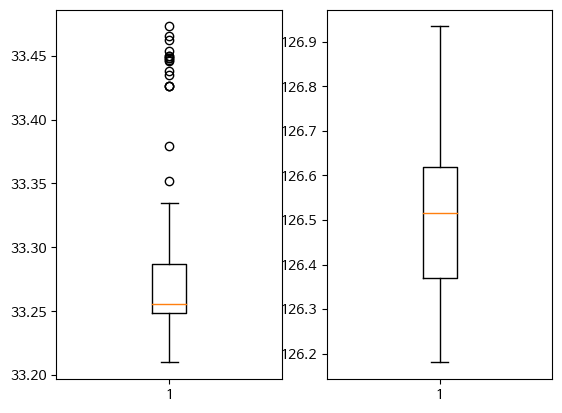

In [10]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(121) # (1) 첫 번째 공간에 axes 생성
ax1.boxplot(df['위도'])
ax2 = plt.subplot(122)
ax2.boxplot(df['경도'])
plt.show()

### 불필요한 컬럼 삭제하기
- '소재지(도로명)' 컬럼 대신 '소재지(지번)'을 사용하면 되기 때문에 이 컬럼은 삭제한다
- '업종명', '데이터기준일자' 컬럼도 분석에 필요하지 않은 내용으로 보고 삭제한다.

In [11]:
df.drop(columns=['업종명', '소재지(도로명)', '데이터기준일자'], axis=1, inplace=True)
df.isnull().sum()

업소명        0
소재지(지번)    0
위도         0
경도         0
dtype: int64

In [12]:
df.head()

,업소명,소재지(지번),위도,경도
0,노베케이션(No Vacation),제주특별자치도 서귀포시 표선면 표선리 40-3,33.325364,126.837714
1,그랜드파파(Grand papa),제주특별자치도 서귀포시 서귀동 829-5,33.246848,126.560673
2,위드윗(withwheat),제주특별자치도 서귀포시 서홍동 166-5,33.267520,126.558177
3,허니제과,제주특별자치도 서귀포시 대정읍 구억리 365-5,33.280342,126.301778
4,도트베이글팩토리(DOT BAGEL FACTORY),제주특별자치도 서귀포시 서호동 325-1,33.255598,126.526362


### 소재지(지번) 주소에서 읍,면,동 정보 추출하기

In [13]:
df['소재지(지번)'].str.split(' ').str[2]

0      표선면
1      서귀동
2      서홍동
3      대정읍
4      서호동
      ... 
162    서귀동
163    서귀동
164    남원읍
165    대정읍
166    안덕면
Name: 소재지(지번), Length: 167, dtype: object

In [14]:
df['읍면동'] = df['소재지(지번)'].str.split(' ').str[2]
df.head()

,업소명,소재지(지번),위도,경도,읍면동
0,노베케이션(No Vacation),제주특별자치도 서귀포시 표선면 표선리 40-3,33.325364,126.837714,표선면
1,그랜드파파(Grand papa),제주특별자치도 서귀포시 서귀동 829-5,33.246848,126.560673,서귀동
2,위드윗(withwheat),제주특별자치도 서귀포시 서홍동 166-5,33.267520,126.558177,서홍동
3,허니제과,제주특별자치도 서귀포시 대정읍 구억리 365-5,33.280342,126.301778,대정읍
4,도트베이글팩토리(DOT BAGEL FACTORY),제주특별자치도 서귀포시 서호동 325-1,33.255598,126.526362,서호동


In [ ]:
df.info()

## 데이터 탐색하기

### 빵집이 제일 많은 동네는 어디일까?

In [15]:
df['읍면동'].value_counts()

읍면동
대정읍    26
안덕면    23
성산읍    16
동홍동    13
서귀동    12
남원읍    10
표선면    10
하효동     9
중문동     9
서호동     8
법환동     6
서홍동     6
강정동     6
색달동     5
회수동     2
토평동     2
상예동     1
신효동     1
월평동     1
호근동     1
Name: count, dtype: int64

In [ ]:
# 대정읍-> 안덕면 -> 성산읍 순서로 빵집이 많다.

In [16]:
df.loc[df['읍면동']=='대정읍'][['업소명', '소재지(지번)']]

,업소명,소재지(지번)
3,허니제과,제주특별자치도 서귀포시 대정읍 구억리 365-5
5,수께로(Suekkero),제주특별자치도 서귀포시 대정읍 하모리 923-5
8,소낭베이커리,제주특별자치도 서귀포시 대정읍 상모리 418
9,우리제과,제주특별자치도 서귀포시 대정읍 하모리 1497-4
19,제주우도슈크레,제주특별자치도 서귀포시 대정읍 보성리 2547 빌리지 더휴
20,베이커리픽키키(Bakery Pickiki),제주특별자치도 서귀포시 대정읍 상모리 3854-8
32,버터리팬트리(BUTTERY PANTRY),제주특별자치도 서귀포시 대정읍 하모리 1560-3
44,아베크아롬(AVEC AROME),제주특별자치도 서귀포시 대정읍 구억리 980
55,라퐁텐,제주특별자치도 서귀포시 대정읍 보성리 163-5
58,스텔,제주특별자치도 서귀포시 대정읍 일과리 1933번지


### 중문동/서호동에 있는 빵집의 주소 알아보기

In [17]:
# df.loc[df['읍면동']=='중문동'][['업소명', '소재지(지번)']]
df.loc[df['읍면동']=='서호동'][['업소명', '소재지(지번)']]

,업소명,소재지(지번)
4,도트베이글팩토리(DOT BAGEL FACTORY),제주특별자치도 서귀포시 서호동 325-1
26,이공일(201),제주특별자치도 서귀포시 서호동 297
47,시스터필드서호점,제주특별자치도 서귀포시 서호동 1554-6
54,이민욱제빵소,제주특별자치도 서귀포시 서호동 1231-9 1충
61,드숑(신시가지),제주특별자치도 서귀포시 서호동 1615-10
99,채점석베이커리 혁신도시점,제주특별자치도 서귀포시 서호동 1554-4
108,더심플,제주특별자치도 서귀포시 서호동 1551-10번지
119,파리바게뜨서귀포월드컵점,제주특별자치도 서귀포시 서호동 1550-6


## 데이터 시각화 하기
- 지도위에 위치와 정보 표시하기
- folium 사용법 <br>
https://python-visualization.github.io/folium/quickstart.html#Getting-Started

### folium사용하기

In [18]:
!pip install folium

In [19]:
import folium

In [20]:
folium.__version__

'0.14.0'

In [21]:
# 초기위치(위도,경도)=서귀포시 33.2541205,126.560076
lati, long  = 33.2541205,126.560076
map = folium.Map(location = [lati, long], zoom_start= 10)
map

In [22]:
map = folium.Map(location = [ lati, long ],
                 zoom_start= 10
                 )
tooltip = 'click'
folium.Marker(
    location = [lati, long ],
    popup = '<strong>hello jeju</strong>',
    icon = folium.Icon(color = 'pink', icon = 'heart'),
    tooltip = tooltip
).add_to(map)
map

### 제과점 위치 마커 표시하기

In [23]:
df.head()

,업소명,소재지(지번),위도,경도,읍면동
0,노베케이션(No Vacation),제주특별자치도 서귀포시 표선면 표선리 40-3,33.325364,126.837714,표선면
1,그랜드파파(Grand papa),제주특별자치도 서귀포시 서귀동 829-5,33.246848,126.560673,서귀동
2,위드윗(withwheat),제주특별자치도 서귀포시 서홍동 166-5,33.267520,126.558177,서홍동
3,허니제과,제주특별자치도 서귀포시 대정읍 구억리 365-5,33.280342,126.301778,대정읍
4,도트베이글팩토리(DOT BAGEL FACTORY),제주특별자치도 서귀포시 서호동 325-1,33.255598,126.526362,서호동


In [24]:
df.loc[0,'위도']
df.loc[5, '위도']


33.22141736

### 마커에 정보 넣기

In [25]:
for idx in df.index :
  lat = df.loc[idx,'위도']
  lng = df.loc[idx,'경도']
  marker = folium.Marker(
      location = [lat, lng],
      popup = f"<div style='width:100px'> <strong>{df.loc[idx,'업소명']}</strong><br>\
      {df.loc[idx, '소재지(지번)']}</div>",
      icon = folium.Icon(color='orange', icon='cloud')
      )
  marker.add_to(map)

map

In [33]:
# 데이터 정렬()
df = df.sort_values(by=['읍면동','업소명'], ascending=True)
# 읍면동별로 아이콘 컬러를 다르게 설정하기
# help(folium.Icon)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']
v_idx = 0
v_color = 'orange'
v_읍면동 = df.loc[v_idx, '읍면동']
for idx in df.index :
    # 아이콘 색상 다르게 지정(읍면동별로)
    if df.loc[idx, '읍면동'] == v_읍면동:
        v_color = colors[v_idx]
    else:
        # 컬러 리스트의 색상을 모두 사용하면 다시 처음으로
        if len(colors)-1 == v_idx:
            v_idx = 0
        else:
            v_idx += 1
        v_color = colors[v_idx]
        v_읍면동 = df.loc[idx, '읍면동']

    lat = df.loc[idx,'위도']
    lng = df.loc[idx,'경도']
    marker = folium.Marker(
        location = [lat, lng],
        popup = f"<div style='width:100px'> <strong>{df.loc[idx,'업소명']}</strong><br>\
        {df.loc[idx, '소재지(지번)']}</div>",
        icon = folium.Icon(color=v_color, icon='cloud')
        )
    marker.add_to(map)

map

In [32]:
from folium.plugins import MarkerCluster

map = folium.Map(location = [33.3616666,126.5291666 ],
                 zoom_start= 10
                 )

marker_cluster = MarkerCluster().add_to(map)

for idx in df.index :
  lat = df.loc[idx,'위도']
  lng = df.loc[idx,'경도']
  marker = folium.Marker(
      location = [lat, lng],
      popup = f"<div style='width:100px'> <strong>{df.loc[idx,'업소명']}</strong><br>\
      {df.loc[idx, '소재지(지번)']}</div>",
      icon = folium.Icon(color='orange', icon='cloud')
      )
  marker.add_to(marker_cluster)

map
